Columns in dataset: Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')
Accuracy: 88.58%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

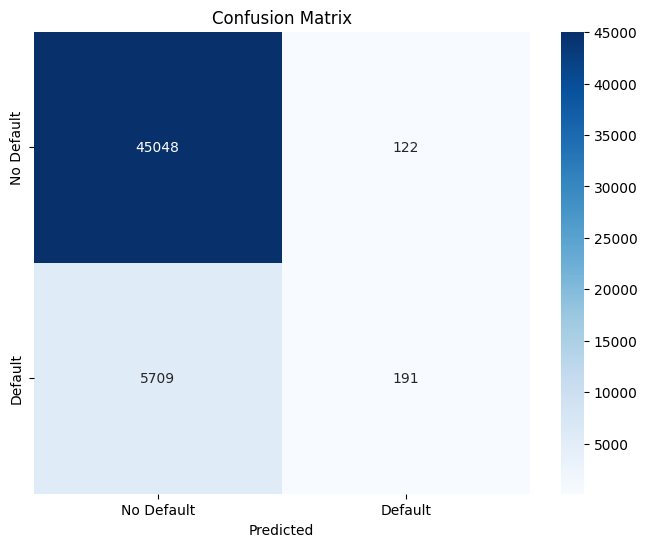

In [10]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset from the given file path
data = pd.read_csv('/content/1. Predict Loan Default.csv')

# Display the column names of the dataset to understand its structure
print("Columns in dataset:", data.columns)

# Separate features (X) and target (y)
X = data.drop(['LoanID', 'Default'], axis=1)  # Drop 'LoanID' and 'Default' as they are not features for prediction
y = data['Default']  # The target variable is 'Default' (whether the loan defaulted or not)

# Define the preprocessing for numerical and categorical columns
# We are using two transformations:
# - Standard Scaling for numerical columns (e.g., Age, Income, CreditScore)
# - One-Hot Encoding for categorical columns (e.g., Education, EmploymentType)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),  # Standard scale numerical features
        ('cat', OneHotEncoder(drop='first'), X.select_dtypes(include=['object']).columns)  # One-hot encode categorical features
    ])

# Create a pipeline that first preprocesses the data, then applies the Logistic Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing to the data
    ('classifier', LogisticRegression(max_iter=1000))  # Train a Logistic Regression model
])

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's accuracy (how often the classifier makes the correct prediction)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate the confusion matrix to compare actual vs predicted values
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Plot the heatmap
            xticklabels=['No Default', 'Default'],  # Labels for the x-axis
            yticklabels=['No Default', 'Default'])  # Labels for the y-axis
plt.title('Confusion Matrix')  # Add title to the plot
plt.xlabel('Predicted')  # Label for the x-axis
plt
